
# Caso de uso: Análisis exploratorio
***

##  DataLovers, S.A.

Durante este fin de semana, una nueva consultoría ha aparecido en el panorama empresarial de la ciudad. Somos una empresa joven, de unas horas de antigüedad, pero con algunos clientes importantes que necesitan soluciones a sus problemas.
***

## Welcome aboard \!

Hoy es tú primer día de trabajo y, después de haberte tomado el café a coste de la empresa y comentar el apasionante Mali-Ghana del mundial SUB-17 del fin de semana, te han asignado tu primera tarea para un nuevo cliente: **LargeInternationalCorporation, INC.**

El CEO de la empresa, un oligarca ruso sin escrupulos que hizo fortuna durante la caída del imperio sovietico con la ayuda de los amigos correctos, está preocupado por la alta tasa de abandono que tiene entre sus empleados. Parece ser que con los años Don Sergey Sokolov se ha dado cuenta de que entender los factores que se asocián con la tasa de abandono le permitirá mantener a los empleados contentos para evitar que se vayan y, quién sabe, incluso aumentar su productividad. Cómo las vacas: cuanto más felices, más leche.¹
***

## Tarea (para ayer)

No te han dado más información que un set de datos y una guía descriptiva de los campos que contiene. Así que la tarea consiste en intentar extraer la mayor cantidad de información posible de los datos y sacar alguna conclusiones para poder ayudar a reducir el número de bajas de la empresa del Sr. Sokolov.
***

## El método
Te han contratado como data scientist. Eso es lo que eres, un científico. Y la ciencia se basa en dos pilares fundamentales. La metodología y la reproducibilidad.
<br>
<br>

<div class="panel panel-success">
  <div class="panel-heading">El método científico</div>
  <div class="panel-body">
      <ol>
        <li>Observación</li>
        <li>Hipótesis</li>
        <li>Experimentación</li>
        <li>Teoría</li>
        <li>Ley</li>
      </ol>
   </div>
</div>

Una versión adaptada a los datos del método científico podría consistir en²:

1. Empezar con datos
1. Desarrollar una intuición sobre los datos y las preguntas que puede responder
1. Hacer la pregunta adecuada
1. Intentar reponderla con los datos y, si no se puede, iterar sobre los puntos anteriores hasta que tengamos una hipótesis que queremos testear.
1. Crear un entorno donde podamos probar nuestra hipótesis
1. Analizar los resultados

Otra forma de decirlo a la americana, es el proceso OSEMN,³ pronunciado awesome.

1. **O**btain data: automatizar la obtención de datos! SQL en databases, web scraping y scripting usando Python y/o shell scripts.
1. **S**crub data: los datos estan sucios. Limpialos.
1. **E**xplore data: conoce tus datos antes de empezar a filosofar
1. **M**odel data: Crea un modelo predictivo a partir de tus datos
1. I**N**terpret results: Que nos dice el modelo con respecto a los datos? Tiene sentido? Se puede interpretar?


Sencillo, verdad? Respuesta: No.


<sub>1. http://www.nacion.com/vivir/ambiente/Vacas-felices-producen-leche_0_1645235488.html</sub>

<sub> 2. [Data Driven, DJ Patil](http://www.oreilly.com/data/free/data-driven.csp). </sub>

<sub> 3. https://machinelearningmastery.com/how-to-work-through-a-problem-like-a-data-scientist/ </sub>

### 1. Preparando el entorno
***
Antes de nada, debemos preparar el entorno para poder empezar a trabajar. Importa las librerías básicas para poder realizar análisis de datos en `python` y poder visualizar los plots en el notebook.

In [1]:
# El "ipython magic" que permite ver los plots en notebooks
%matplotlib inline
# pandas bajo el alias pd
import pandas as pd
# numpy bajo el alias np
import numpy as np

# matplotlib.pyplot bajo el alias plt
import matplotlib.pyplot as plt

# seaborn bajo el alias sns
import seaborn as sns

### 1. Obtención de los datos
***
Tenemos suerte y nos han pasado los datos en un csv. Importa el fichero como DataFrame de pandas y guardalo en la variable `df`

In [2]:
# importa el archivo "HR_data.csv"

df = pd.read_csv('HR_data.csv')


Un primer paso es ver como lucen nuestros datos. Echale un vistazo a las primeras lineas del df

### 2. Chequeo y limpieza
***
Examinemos el set de datos para ver si todo parece correcto


In [3]:
# Echale un vistazo a las columnas del set de datos
# y el tipo de dato que son
df.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157.0,3,0,1.0,0,sales,low
1,0.80,0.86,5,NaN,6,0,1.0,0,sales,medium
2,0.11,0.88,7,272.0,4,0,1.0,0,sales,medium
3,0.72,0.87,5,223.0,5,0,1.0,0,sales,low
4,0.37,0.52,2,159.0,3,0,1.0,0,sales,low


Parece que todos los tipos de datos corresponden o son acordes con el nombre de la columna.

In [4]:
# Que tamaño tiene nuestro set de datos?
df.shape

(14999, 10)

In [5]:
# Echale un vistazo a las primeras filas del set de datos
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157.0,3,0,1.0,0,sales,low
1,0.80,0.86,5,NaN,6,0,1.0,0,sales,medium
2,0.11,0.88,7,272.0,4,0,1.0,0,sales,medium
3,0.72,0.87,5,223.0,5,0,1.0,0,sales,low
4,0.37,0.52,2,159.0,3,0,1.0,0,sales,low


Vaya, parece que hay algún dato que falta. Aunque no lo parezca, hemos tenido suerte de que aparezca algún nulo en el head. Así no nos olvidamos de un paso clave: mirar de manera más exhaustiva si hay otras columnas que puedan contener valores nulos.

In [6]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours     float64
time_spend_company         int64
Work_accident              int64
left                     float64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [7]:
# Comprueba que columnas tienen valores nulos
df.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [8]:
# utiliza el metodo any() al final de la sentencia anterior.
df.isnull().any()


satisfaction_level        True
last_evaluation          False
number_project           False
average_montly_hours      True
time_spend_company       False
Work_accident            False
left                      True
promotion_last_5years    False
sales                    False
salary                    True
dtype: bool

In [9]:
# Comprueba las filas que tienen valores nulos, es decir dónde satisfaciont_level es nulo,
# o donde 'left' es nulo, o donde 'salary es nulo, o donde average_montly hours es nulo
# Puedes usar el caracter '|' para especificar la comparación lógica 'or'.

nul_values_mask = df['satisfaction_level'].isnull() | df['average_montly_hours'].isnull() | \
                  df['left'].isnull() | df['salary'].isnull()
    
df[nul_values_mask]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1,0.80,0.86,5,NaN,6,0,1.0,0,sales,medium
10,NaN,0.54,2,135.0,3,0,1.0,0,sales,low
29,0.38,0.50,2,132.0,3,0,1.0,0,accountinglow,NaN
12961,0.41,0.63,2,145.0,2,0,NaN,0,product_mng,low


In [10]:
# Tip: Podemos pasar los valores que nos devuelve el df.isnull()
# para filtrar el df. Echale un vistazo a la documentación o busca
# en stackoverflow cómo hacerlo
df[df.isnull().any(axis=1)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1,0.80,0.86,5,NaN,6,0,1.0,0,sales,medium
10,NaN,0.54,2,135.0,3,0,1.0,0,sales,low
29,0.38,0.50,2,132.0,3,0,1.0,0,accountinglow,NaN
12961,0.41,0.63,2,145.0,2,0,NaN,0,product_mng,low


Que hacemos con los nulos? Depende. Se puede salvar alguno? Nos va a afectar al conjunto de los datos? Antes de responder, veamos un descriptivo básico del df.

In [11]:
# Realiza un análisis descriptivo del df
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14998.000000,14999.000000,14999.000000,14998.000000,14999.000000,14999.000000,14998.000000,14999.000000
mean,0.612844,0.716102,3.803054,201.046273,3.498233,0.144610,0.238098,0.021268
std,0.248635,0.171169,1.232592,49.942284,1.460136,0.351719,0.425934,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Sabemos de antes que el set de datos tiene 14999 entradas y que hay nulos en cuatro columnas. Solo en una de ellas parece que se podría salvar de forma segura ya que parece que ha habido un error en el parseo.

Vamos a arreglar primero ese valor.

In [12]:
# Encuentra la fila con valores de salary nulos 
# y guarda el indice de la fila en una variable
df[df['salary'].isnull()].index.values[0]

29

In [13]:
# Asigna los valores correctos
df['salary'].loc[29] = 'low'

/home/juanito/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
df['salary'].loc[29]

'low'

In [15]:
df['sales'].loc[29] = 'accounting'

/home/juanito/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
df.loc[29]

satisfaction_level             0.38
last_evaluation                 0.5
number_project                    2
average_montly_hours            132
time_spend_company                3
Work_accident                     0
left                              1
promotion_last_5years             0
sales                    accounting
salary                          low
Name: 29, dtype: object

Vamos a imputar el valor nulo de satisfaction_level con la media de la columna.

In [17]:
# Calcula la media de la columna
media_satisfaccion = df['satisfaction_level'].mean()
# Usa el método fillna() para rellenar el nulo con el valor calculado
df['satisfaction_level'] = df['satisfaction_level'].fillna(media_satisfaccion)

In [18]:
# comprueba que la columna satisfaction no tiene ningun valor nulo
df['satisfaction_level'].isnull().all()

False

Que hacemos con el resto?
Vemos que representan una fracción infima del set de datos total (2/14999 = 0.013%). Nos los cargamos sin piedad.

In [19]:
# utiliza la función dropna()
df = df.dropna()

# comprueba que ninguna columna tenga nulos
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

### Por último, vamos a renombrar las columnas por nombres más explicativos y a poner la etiqueta de si ha dejado la empresa o no en primer lugar

In [20]:
# Utiliza este diccionario para renombrar las columnas

new_cols_dictionary = {'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        }

df = df.rename(columns=new_cols_dictionary)

In [21]:
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157.0,3,0,1.0,0,sales,low
2,0.11,0.88,7,272.0,4,0,1.0,0,sales,medium
3,0.72,0.87,5,223.0,5,0,1.0,0,sales,low
4,0.37,0.52,2,159.0,3,0,1.0,0,sales,low
5,0.41,0.50,2,153.0,3,0,1.0,0,sales,low


In [22]:
# Mueve la variable al frente de la lista de columnas

# 1 - asigna la serie a una variable
columna_turnover = df['turnover']

# 2 - Deja caer (drop()) la columna del df
df = df.drop('turnover', axis=1)

# 3 - Inserta (df.insert()) la columna en primer lugar
df.insert(loc=0, column='turnover', value=columna_turnover)

# 4 - Enseña las primeras filas
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1.0,0.38,0.53,2,157.0,3,0,0,sales,low
2,1.0,0.11,0.88,7,272.0,4,0,0,sales,medium
3,1.0,0.72,0.87,5,223.0,5,0,0,sales,low
4,1.0,0.37,0.52,2,159.0,3,0,0,sales,low
5,1.0,0.41,0.50,2,153.0,3,0,0,sales,low


Parece que nuestro set de datos esta limpio y listo para ser explorado. Vamos a guardarlo de forma que se salven los cambios, por si acaso se nos cae el kernel o tengamos que entregar el set de datos limpio

In [23]:
df.to_csv('HR_data_clean.csv')

Vamos a comprobar que el ficher se ha creado. Podemos ejecutar comandos bash desde una celda de iPython poniendo  `!` al principio

In [24]:
!ls

DescripciónDataset.txt	   EDA-RecursosHumanos_soluciones.ipynb  HR_data.csv
EDA-RecursosHumanos.ipynb  HR_data_clean.csv			 referencias


### 3. Explorar datos
***

Esta sección exploraremos los datos de forma más o menos exhaustiva. Nos basaremos en un análisis estadístico básico y crearemos unos gráficos que nos ayuden a comprender los parametros.

Recuerda que estamos examinando los datos intentando responder a una pregunta. Por qué la gente se va da la empresa?

#### 3.1 Exploración básica

In [25]:
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000
mean,0.238048,0.612845,0.716098,3.803094,201.050010,3.498166,0.144629,0.021271
std,0.425903,0.248633,0.171175,1.232548,49.941852,1.460039,0.351738,0.144291
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [26]:
df['turnover'].value_counts()

0.0    11427
1.0     3570
Name: turnover, dtype: int64

In [27]:
# Que porcentage de gente abandona la empresa?
# El método value_counts() nos agrupa directamente por la columna seleccionada y nos cuenta cuantos valores
# hay de cada elemento único

numero_observaciones = len(df)

tasa_bajas = df['turnover'].value_counts() / numero_observaciones
print(tasa_bajas)

0.0    0.761952
1.0    0.238048
Name: turnover, dtype: float64


In [28]:
# Como son los descriptivos estadisticos básico de todo el dataset?
df.describe()


,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000
mean,0.238048,0.612845,0.716098,3.803094,201.050010,3.498166,0.144629,0.021271
std,0.425903,0.248633,0.171175,1.232548,49.941852,1.460039,0.351738,0.144291
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [29]:
# y por gente que lo deja o no lo deja?
# Haz un groupby por 'turnover' y utiliza otra vez la funcion describe()
df.groupby(['turnover']).mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0.0,0.666832,0.715481,3.786821,199.064934,3.380152,0.175024,0.026254
1.0,0.440043,0.718073,3.855182,207.403922,3.875910,0.047339,0.005322


Qué primeras conclusiones sacas?

A primera vista, hay alguna diferencia en algunos de las caracteristicas para cada uno de los grupos?

Hay algo que te llame la atención?

Utiliza la casilla Markdown de abajo para escribir tus conclusiones.

#### Conclusiones 3.1 Exploración básica

***

La gente esta descontenta pq trabaja muchas horas y no promociona.

#### 3.2 Correlación entre variables
***
Normalmente, algunas variables presentaran correlaciones entre sí. De forma positiva, como la temperatura ambiente y el consumo de helado, o negativas, como la temperatura ambiente y el número de capas de ropa que llevo.

En este apartado vamos a tratar de ver cómo se correlacionan las variables entre si, y ver si podemos extraer algún tipo de información de esta.

In [30]:
# calcula la matriz de correlación usando df.corr()
df.corr()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388484,0.006449,0.023622,0.071115,0.144616,-0.154608,-0.061783
satisfaction,-0.388484,1.000000,0.104916,-0.143184,-0.020231,-0.101042,0.058681,0.025600
evaluation,0.006449,0.104916,1.000000,0.349276,0.339678,0.131482,-0.007095,-0.008681
projectCount,0.023622,-0.143184,0.349276,1.000000,0.417103,0.196621,-0.004755,-0.006069
averageMonthlyHours,0.071115,-0.020231,0.339678,0.417103,1.000000,0.127567,-0.010141,-0.003544
yearsAtCompany,0.144616,-0.101042,0.131482,0.196621,0.127567,1.000000,0.002140,0.067449
workAccident,-0.154608,0.058681,-0.007095,-0.004755,-0.010141,0.002140,1.000000,0.039238
promotion,-0.061783,0.025600,-0.008681,-0.006069,-0.003544,0.067449,0.039238,1.000000


Aunque no imposible, es dificil ver las tendencias a partir de valores numéricos, y eso que solo tenemos 10 variables!
Vamos a intentar plotear un mapa de calor que nos diga cómo se correlacionan. Usaremos **seaborn** y [éste](http://seaborn.pydata.org/examples/many_pairwise_correlations.html) snippet de codigo para generar un plot informativo y que nos entre por la vista.

In [31]:
### Crea una funcion llamada correlation_plot a partir del snippet mencionado arriba que nos cree un plot dado
### un df de pandas y las columnas que queremos usar. Si no se especifican las columnas, usar todo el df

def correlation_plot(df, cols=None):
    """
    Dada una matriz de correlacion, genera un heatmap para visualizar
    las correlaciones entre las variables.
    """
    
    sns.set(style="white")
    if cols:
        corr = df[cols].corr()
    else:
        corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})


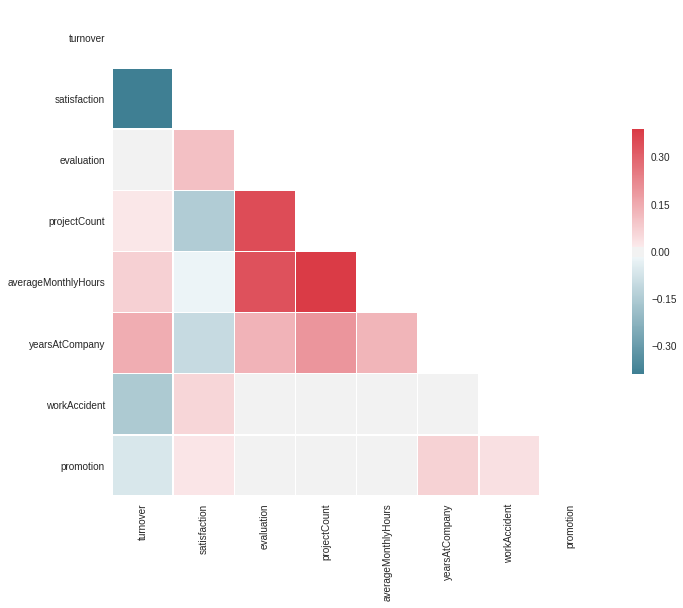

In [33]:
correlation_plot(df)

** Que correlaciones positivas y negativas hay entre el turnover y el resto de variables?**

Correlaciones positivas:
    * variables?
    
Correlaciones negativas:
    * variables?

** Qué variables presentan correlaciones fuertes entre sí? **
  

***
#### 3.3 Investigando las correlaciones
***
Hemos visto que el abandono de la empresa esta fuertemente correlacionado con la satisfacción en la empresa.

Podemos determinar si existe una diferencia significativa entre la satisfacción de los empleados que continuan o que dimiten?

In [35]:
# Calcula la media y la desviación estandar de la satisfacción
# de los empleados que abandonan o se quedan en la empresa
df.groupby('turnover')['satisfaction'].mean()

turnover
0.0    0.666832
1.0    0.440043
Name: satisfaction, dtype: float64

In [36]:
# calcula la desviación estandar
df.groupby('turnover')['satisfaction'].std()


turnover
0.0    0.217100
1.0    0.263917
Name: satisfaction, dtype: float64

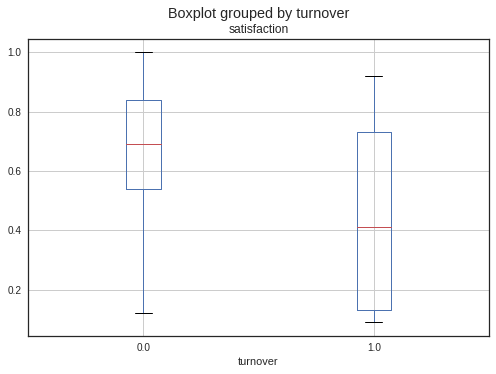

In [37]:
# Gráfica los boxplots para ver como es la dispersion en cada cao
df.boxplot(column='satisfaction', by='turnover')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cfd4fd710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f5cfd482240>], dtype=object)

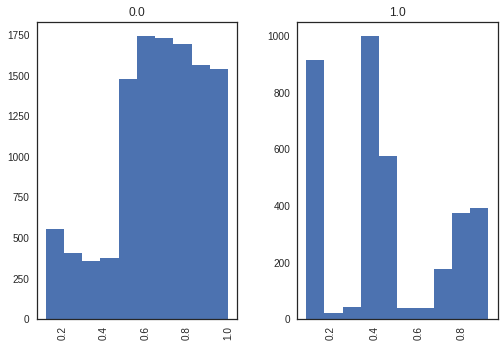

In [38]:
#usa una sintaxis similar pero para sacar los histogamas
df.hist(column='satisfaction', by='turnover')

Realmente a partir de las medias y desviaciones obtenidas, así como por la dispersión de los datos en los plots, parece que tenemos una clara distinción en la satisfacción de la gente que abandona la empresa o se queda.

Podríamos darle un poco más de solidez haciendo un test estadístico?

In [39]:
#scipy es la libreria cientifica de python. Entre otras,
# contiene una librería muy potente de estadística con la que
# podremos hacer analísis de hipótesis.
from scipy import stats

In [40]:
# filtra el df de forma que devuelva solo los valores de satisfaccino
# que corresponden a gente que ha abandonado la empresa, i.e.: turnover == 1

valores_satisfaccion_abandono = df[df['turnover']==1]['satisfaction']

valores_satisfaccion_no_abandono = df[df['turnover']==0]['satisfaction']

$H_0: \mu(satisfaction)_{aband} = \mu(satisfaction)_{NoAband} $

$H_1: \mu(satisfaction)_{aband} \not=  \mu(satisfaction)_{NoAband} $

In [43]:
# Que test estadístico podríamos usar para evaluar la hipotesis nula?
ks_stat, p_valor = stats.ks_2samp(valores_satisfaccion_abandono,
                                  valores_satisfaccion_no_abandono)

In [45]:
p_valor

0.0

Podemos rechazar $H_0$?

**Parece ser que estamos llegando a una conclusión sólida de que los empleados menos satisfechos son los que tienen más riesgo de abandonar la empresa. Pero, que causa que los empleados estén insatisfechos?**

/home/juanito/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/juanito/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


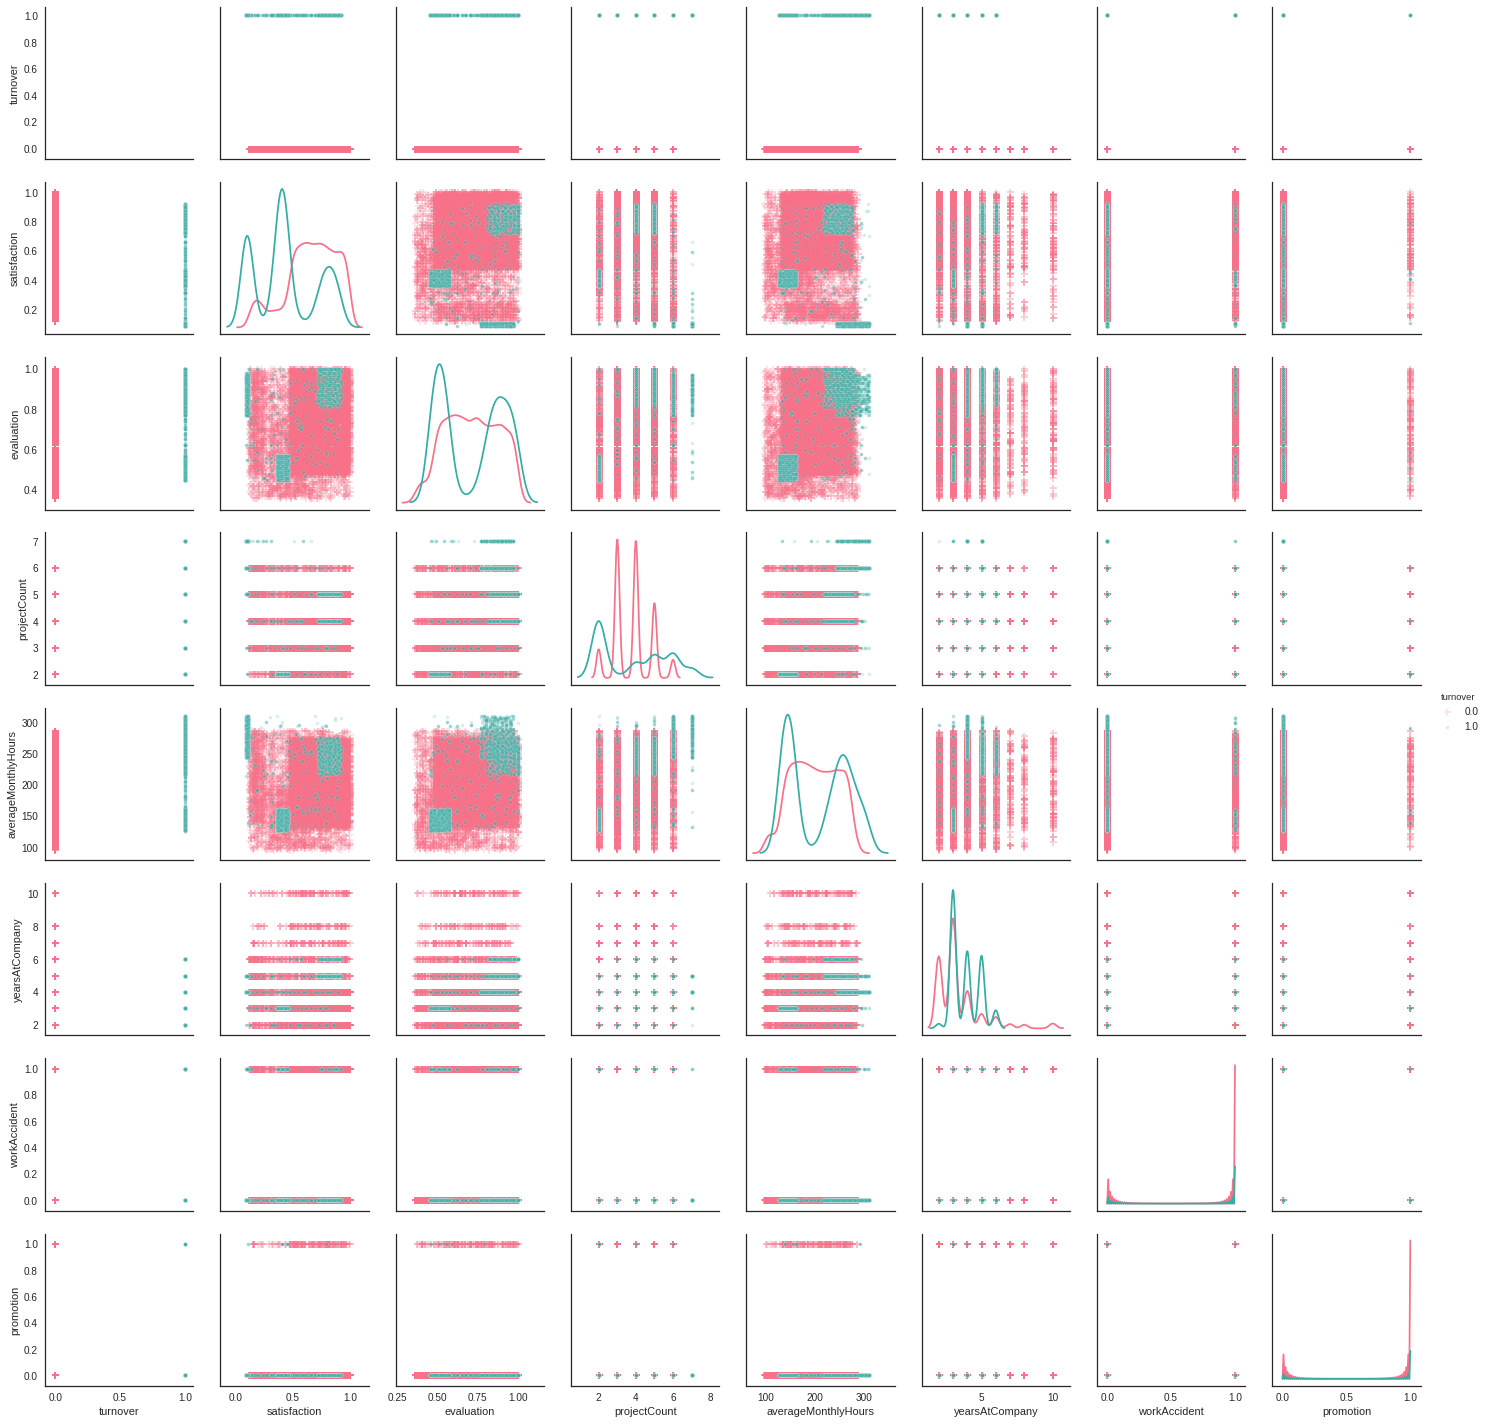

In [46]:
# Ejecuta la celda para ver el resultado de plotear variable a variable los scatter plots.
# En la diagonal apareceran los kde de los histogramas

sns.pairplot(data=df,  # los datos
             hue='turnover',  # el campo por el que queremos agruparlo
             diag_kind='kde', # el tipo de grafico que queremos en la diagonal: histograma o kde
             palette="husl", # la paleta de colores
             markers=["+", "."], # los marcadores de los puntos
             plot_kws={'alpha': 0.2} # la transparencia de los puntos
            )

Que conclusiones podemos sacar a partir de lo de arriba?

Te llama la atención el plot de satisfacción vs. evaluación?

### 3.4 Enfasis en salario

Por último, vamos a intentar ver una de las variables que hemos pasado por alto. El salario.

In [47]:
# muestra los valores de salarios que hay en la tabla
df['salary'].value_counts()

low       7315
medium    6445
high      1237
Name: salary, dtype: int64

In [49]:
# Investiguemos la repartición entre los que han abandonado la empresa y los que se han quedado
df.groupby('turnover')['salary'].value_counts()


turnover  salary
0.0       low       5143
          medium    5129
          high      1155
1.0       low       2172
          medium    1316
          high        82
Name: salary, dtype: int64

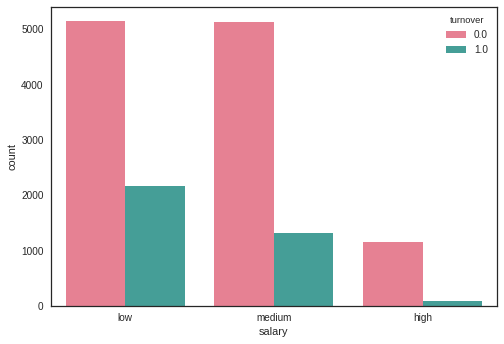

In [50]:
# hmmm, mejor veamoslo

sns.countplot(data=df,
              x='salary',
              hue='turnover',
              palette='husl')

Hmmm, los que menos cobrán son los que tienen más tendencia a irse de la empresa.

Podrías decir algo entre las horas trabajadas, el número de proyectos y el hecho de que los empleados se vayan?

In [51]:
df.columns

Index(['turnover', 'satisfaction', 'evaluation', 'projectCount',
       'averageMonthlyHours', 'yearsAtCompany', 'workAccident', 'promotion',
       'department', 'salary'],
      dtype='object')

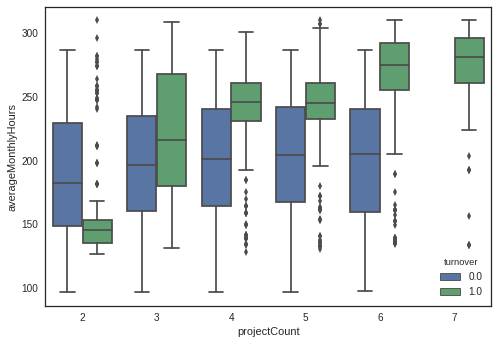

In [52]:
# usa la opción de boxplot de seaborn.
sns.boxplot(data=df,
            x='projectCount',
            y='averageMonthlyHours',
            hue='turnover')

# Conclusiones finales
***
El proceso de preguntas-respuestas-nuevas preguntas en un exploratorio de datos puede ser largo y llevar mucho tiempo. De hecho, todo el tiempo que queramos. Es importante intentar mantener el foco en aquello que queremos contestar y no desviarnos mucho del objetivo.

A qué conclusiones podemos llegar?

# Extra
***

* Cómo contruirias un modelo que acertase si una persona va a dejar la empresa con un acierto del 75% ?

* Aunque no lo hayamos visto en esta clase, se te ocurre que algoritmo de ML podríamos usar para crear un modelo predictivo que venciear nuestro modelo naive?

* Cómo podríamos mejorarlo?

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
clf = DecisionTreeClassifier(class_weight='balanced')

In [56]:
df.columns

Index(['turnover', 'satisfaction', 'evaluation', 'projectCount',
       'averageMonthlyHours', 'yearsAtCompany', 'workAccident', 'promotion',
       'department', 'salary'],
      dtype='object')

In [57]:
y = df['turnover']

In [65]:
X = df[['satisfaction', 'evaluation', 'projectCount',
       'averageMonthlyHours', 'yearsAtCompany',]]

In [66]:
y.shape

(14997,)

In [67]:
X.shape

(14997, 5)

In [68]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
X.loc[0]

satisfaction             0.38
evaluation               0.53
projectCount             2.00
averageMonthlyHours    157.00
yearsAtCompany           3.00
Name: 0, dtype: float64

In [77]:
clf.feature_importances_

array([ 0.43577298,  0.12137495,  0.03329333,  0.08121591,  0.32834282])

In [78]:
X.columns

Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany'],
      dtype='object')